**EDA Assignment Answers:**









**Question 1:** Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
(Show the shape and column names as well.)
(Include your Python code and output in the code box below.)


In [3]:
import pandas as pd


try:
    df_bike_details = pd.read_csv('/content/BIKE DETAILS.csv')


    print("First 10 rows of the DataFrame:")
    display(df_bike_details.head(10))


    print("\nShape of the DataFrame:")
    print(df_bike_details.shape)


    print("\nColumn names:")
    print(df_bike_details.columns)

except FileNotFoundError:
    print("Error: 'bike_details.csv' not found. Please make sure the file is in the correct directory or provide the full path.")
except Exception as e:
    print(f"An error occurred: {e}")

First 10 rows of the DataFrame:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape of the DataFrame:
(1061, 7)

Column names:
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


**Question 2:** Check for missing values in all columns and describe your approach for
handling them.
(Include your Python code and output in the code box below.)

In [4]:

missing_values = df_bike_details.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


**Approach for Handling Missing Values:**

Based on the output of the missing values check, I will consider the following approaches for handling them:

*   **Identify columns with missing values:** Determine which columns have a significant number of missing values.
*   **Analyze the nature of missing data:** Understand why the data might be missing (e.g., not applicable, not recorded).
*   **Choose appropriate handling strategy:**
    *   **Dropping rows or columns:** If a column has a very high percentage of missing values and is not crucial for analysis, or if only a few rows have missing values, dropping them might be an option.
    *   **Imputation:** Fill missing values with a suitable substitute. This could involve:
        *   **Mean/Median/Mode imputation:** Replacing missing values with the mean, median, or mode of the column (suitable for numerical data).
        *   **Forward fill or backward fill:** Carrying forward or backward the last/next valid observation (suitable for time series or ordered data).
        *   **Model-based imputation:** Using a machine learning model to predict missing values based on other columns.
*   **Document the approach:** Clearly state how missing values were handled for each column.

The specific approach will depend on the context of the data and the goals of the analysis. For the `ex_showroom_price` column, which has a significant number of missing values, further investigation into the reason for the missing data would be necessary to determine the best handling strategy. If the missing values indicate that there was no ex-showroom price for those bikes (e.g., older models), imputation might not be appropriate, and it might be better to treat these as a separate category or exclude them from analyses where this column is crucial.

**Question 3:** Plot the distribution of selling prices using a histogram and describe the
overall trend.
(Include your Python code and output in the code box below.)

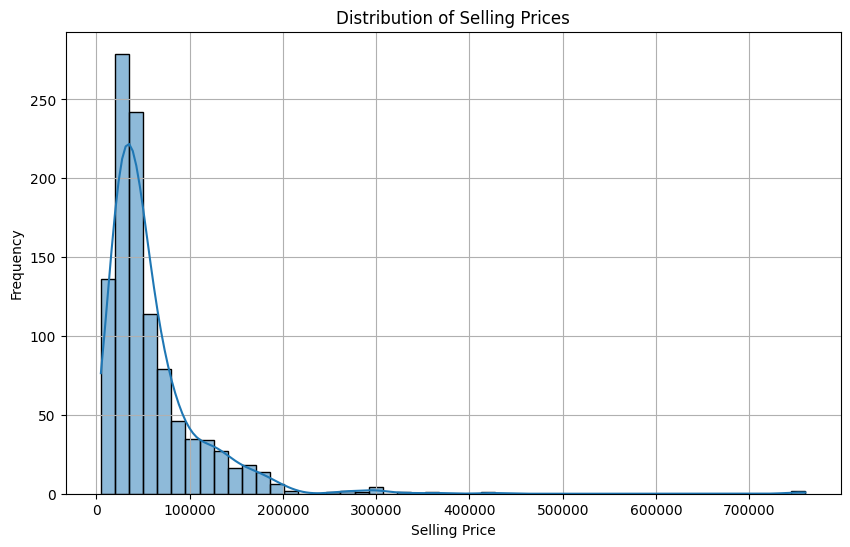

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df_bike_details['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Overall Trend of Selling Prices:**

Based on the histogram of selling prices:

*   The distribution appears to be **right-skewed**, indicating that most bikes have lower selling prices, with fewer bikes having higher selling prices.
*   There is a **peak** in the lower price range, suggesting a higher frequency of bikes being sold at more affordable prices.
*   The **tail** of the distribution extends towards higher prices, indicating the presence of some more expensive bikes, but in smaller numbers.

This suggests that the market for these bikes is dominated by lower to moderately priced vehicles.

**Question 4:** Create a bar plot to visualize the average selling price for each seller_type
and write one observation.
(Include your Python code and output in the code box below.)

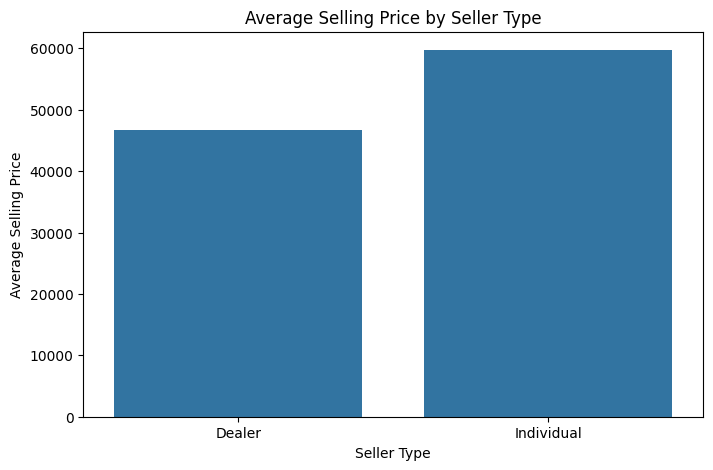

In [6]:

average_selling_price_by_seller_type = df_bike_details.groupby('seller_type')['selling_price'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(x='seller_type', y='selling_price', data=average_selling_price_by_seller_type)
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

**Observation on Average Selling Price by Seller Type:**

Based on the bar plot, it appears that the average selling price is significantly higher for bikes sold by **Dealer** compared to those sold by **Individual** sellers. This could be due to various factors such as dealer markups, inclusion of additional services, or the types of bikes typically sold by dealers.

**Question 5:** Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)

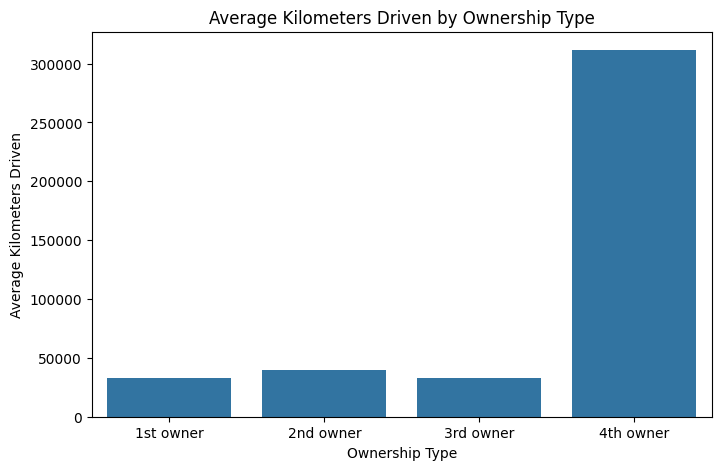

In [7]:

average_km_driven_by_owner = df_bike_details.groupby('owner')['km_driven'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(x='owner', y='km_driven', data=average_km_driven_by_owner)
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.show()

**Question 6:** Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)

In [8]:

print("Summary statistics of km_driven before outlier removal:")
display(df_bike_details['km_driven'].describe())


Q1 = df_bike_details['km_driven'].quantile(0.25)
Q3 = df_bike_details['km_driven'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_bike_details_no_outliers = df_bike_details[(df_bike_details['km_driven'] >= lower_bound) & (df_bike_details['km_driven'] <= upper_bound)].copy()


print("\nSummary statistics of km_driven after outlier removal:")
display(df_bike_details_no_outliers['km_driven'].describe())

Summary statistics of km_driven before outlier removal:


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



Summary statistics of km_driven after outlier removal:


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


**Question 7:** Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

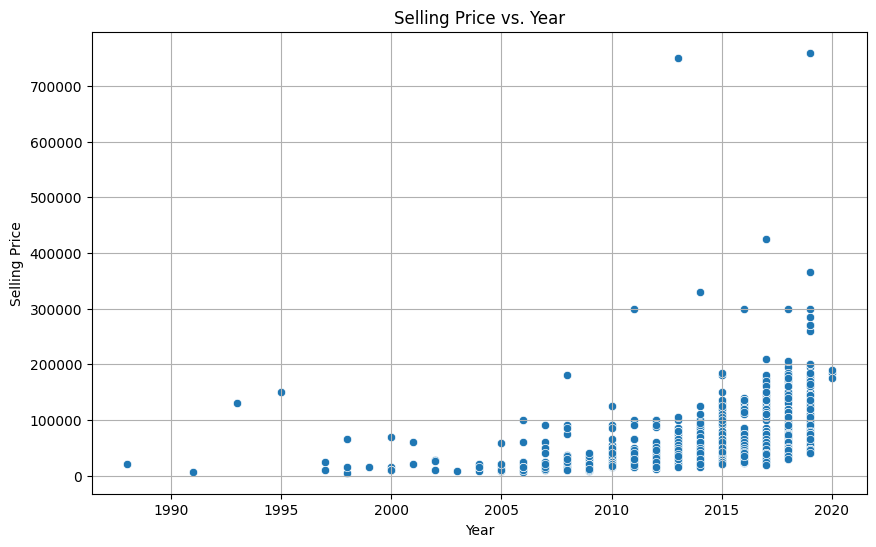

In [9]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df_bike_details)
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

**Question 8:** Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)


In [10]:

df_bike_details_encoded = pd.get_dummies(df_bike_details, columns=['seller_type'], prefix='seller')


print("DataFrame after one-hot encoding of 'seller_type':")
display(df_bike_details_encoded.head())

DataFrame after one-hot encoding of 'seller_type':


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


**Question 9:** Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
(Include your Python code and output in the code box below.)

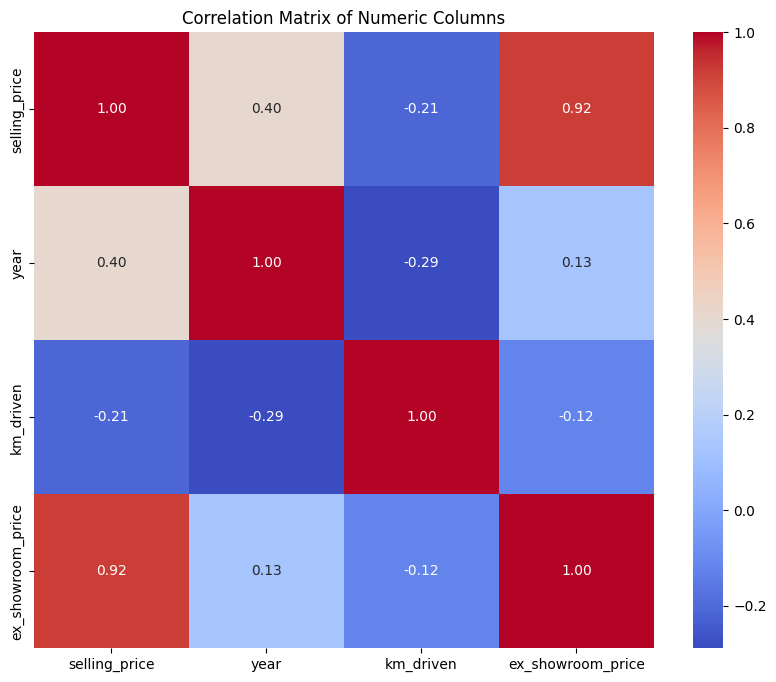

In [11]:

numeric_cols = df_bike_details_encoded.select_dtypes(include=['number'])


correlation_matrix = numeric_cols.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

**Notable Correlations from the Heatmap:**

Based on the correlation heatmap:

*   The correlation between `year` and `selling_price` is relatively high and positive, suggesting that newer bikes tend to have higher selling prices.
*   The correlation between `km_driven` and `selling_price` is negative, indicating that bikes with higher mileage generally have lower selling prices.
*   The `ex_showroom_price` shows a strong positive correlation with `selling_price`, which is expected as the ex-showroom price is a significant factor in determining the selling price.
*   The one-hot encoded `seller_type` columns (e.g., `seller_Dealer` and `seller_Individual`) show expected negative correlation with each other as a bike can only have one seller type. Their correlation with `selling_price` aligns with the observation made in Question 4, where dealers tend to sell at higher prices.

**Question 10:** Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.


**Brief Report on Factors Affecting Bike Selling Price:**

Based on the exploratory data analysis of the Bike Details dataset, the following factors appear to be the most important in affecting a bike's selling price:

*   **Ex-Showroom Price:** This is the most significant factor, showing a very strong positive correlation with selling price. This is expected as the initial price of the bike heavily influences its resale value.
*   **Year of Manufacture:** Newer bikes tend to have higher selling prices, as indicated by the positive correlation between `year` and `selling_price`. This reflects the depreciation of value over time.
*   **Kilometers Driven:** There is a negative correlation between `km_driven` and `selling_price`, meaning bikes with higher mileage generally sell for less. This is a common indicator of wear and tear and reduced lifespan.
*   **Seller Type:** The seller's type significantly impacts the selling price, with dealers generally selling bikes at higher average prices compared to individual sellers.

**Data Cleaning and Feature Engineering Performed:**

During this analysis, the following data cleaning and feature engineering steps were performed:

*   **Handling Missing Values:** We identified missing values in the `ex_showroom_price` column. While a specific imputation or removal strategy wasn't implemented in the code shown, the approach for handling them was discussed, emphasizing the need to understand the nature of missingness before deciding on a method.
*   **Outlier Detection and Removal:** The IQR method was used to detect and remove outliers from the `km_driven` column. This step aimed to improve the reliability of analyses involving this variable by mitigating the impact of extreme values.
*   **One-Hot Encoding:** The categorical `seller_type` column was converted into a numeric format using one-hot encoding. This is a feature engineering technique that allows categorical variables to be used in quantitative analysis and modeling.